# import

In [5]:
folder_path ='/Users/liu/Desktop/Pitts/Project/data/R3_1971_YE_ENCOUNTER_NOTES_2021_03_05'

In [6]:
%pwd

'/Users/liu/Desktop/Pitts/Project/Disheng_code/csv analysis'

In [7]:
import os
for i in os.listdir(folder_path):
    print(i)

.DS_Store
R3_1971_YE_ED_DATES_2021_03_01.csv
R3_1971_YE_PROCEDURES_2021_03_01.csv
R3_1971_YE_DIAGNOSES_2021_03_01.csv
R3_1971_YE_DEMOGRAPHICS_2021_03_01.csv
R3_1971_YE_LAB_RESULTS_2021_03_01.csv
R3_1971_YE_ENCOUNTERS_2021_03_01.csv
R3_1971_YE_PROBLEM_LIST_2021_03_01.csv
R3_1971_YE_ENCOUNTER_NOTES_2021_03_01.csv
R3_1971_YE_PROCEDURE_NOTES_2021_03_01.csv


In [8]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# date

In [177]:
date = pd.read_csv(folder_path+'/'+os.listdir(folder_path)[1])
date.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148369 entries, 0 to 148368
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   STUDY_ID  148369 non-null  int64 
 1   ED_DATE   148369 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [178]:
date.value_counts()

STUDY_ID    ED_DATE   
5220000150  02/20/2018    1
5223494400  11/04/2018    1
5223492815  07/08/2020    1
5223492881  01/26/2020    1
5223492891  12/22/2020    1
                         ..
5222320324  07/08/2019    1
5222320329  06/04/2017    1
5222320331  01/13/2020    1
5222320350  01/15/2017    1
5229272723  12/28/2020    1
Length: 148369, dtype: int64

# PROCEDURES

In [179]:
PROCEDURES = pd.read_csv(folder_path+'/'+os.listdir(folder_path)[2],encoding = "ISO-8859-1",low_memory=False)
PROCEDURES 

,STUDY_ID,ORDER_PROC_ID,ORDER_DATE,PROC_DATE,PROC_CODE,PROC_TYPE,PROC_NAME,PROC_LOCATION
0,5220273633,NaN,NaN,01/11/2017,005M3ZZ,ICD10,"Destruction of Facial Nerve, Percutaneous Appr...",OR
1,5222356008,NaN,NaN,08/29/2017,005M3ZZ,ICD10,"Destruction of Facial Nerve, Percutaneous Appr...",OR
2,5220477797,NaN,NaN,02/20/2019,005M3ZZ,ICD10,"Destruction of Facial Nerve, Percutaneous Appr...",OR
3,5220267350,NaN,NaN,03/08/2019,005M3ZZ,ICD10,"Destruction of Facial Nerve, Percutaneous Appr...",OR
4,5223143456,NaN,NaN,04/11/2019,005M3ZZ,ICD10,"Destruction of Facial Nerve, Percutaneous Appr...",OR
...,...,...,...,...,...,...,...,...
716038,5225972794,452732445.0,03/02/2020,NaN,ECT00195,CUSTOM,IVIG ORDERS,NaN
716039,5222944648,494465452.0,11/24/2020,NaN,IMG10579,CUSTOM,NM GASTRIC EMPTYING STUDY DUAL PHASE,NaN
716040,5225786576,497766765.0,12/14/2020,NaN,IMG10556,CUSTOM,MR TOTAL SPINE WITH CONTRAST,NaN
716041,5222796057,498505682.0,12/18/2020,NaN,IMG10556,CUSTOM,MR TOTAL SPINE WITH CONTRAST,NaN


In [180]:
PROCEDURES.describe(include = 'all')

,STUDY_ID,ORDER_PROC_ID,ORDER_DATE,PROC_DATE,PROC_CODE,PROC_TYPE,PROC_NAME,PROC_LOCATION
count,7.160430e+05,5.359570e+05,535957,180086,716043,712120,713161,179658
unique,NaN,NaN,3558,3485,7363,10,7837,4
top,NaN,NaN,11/30/2020,11/30/2020,93000,CUSTOM,"ELECTROCARDIOGRAM, COMPLETE - EXTERNAL REFERRAL",ER
freq,NaN,NaN,1689,585,86661,328184,85701,91050
mean,5.223116e+09,3.795631e+08,NaN,NaN,NaN,NaN,NaN,NaN
std,1.828700e+06,1.112841e+08,NaN,NaN,NaN,NaN,NaN,NaN
min,5.220000e+09,2.345674e+07,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.222141e+09,3.190336e+08,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.222746e+09,4.024989e+08,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.225106e+09,4.726120e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
PROCEDURES  = PROCEDURES.loc[:,['STUDY_ID','PROC_CODE','PROC_TYPE','PROC_NAME','PROC_LOCATION']]
(PROCEDURES.describe(include = 'object'))

,PROC_CODE,PROC_TYPE,PROC_NAME,PROC_LOCATION
count,716043,712120,713161,179658
unique,7363,10,7837,4
top,93000,CUSTOM,"ELECTROCARDIOGRAM, COMPLETE - EXTERNAL REFERRAL",ER
freq,86661,328184,85701,91050


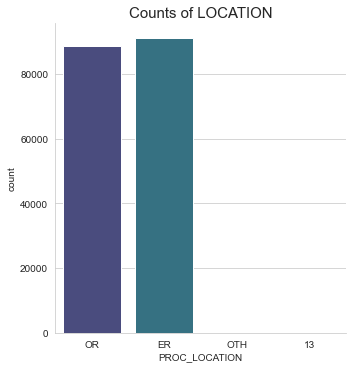

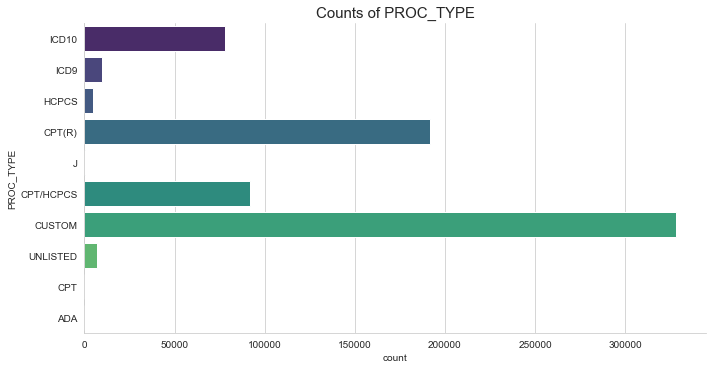

In [182]:
sns.set_style('whitegrid')
sns.catplot(data = PROCEDURES, x = 'PROC_LOCATION',kind='count',palette = 'viridis',aspect=1)
plt.title('Counts of LOCATION',fontsize = 15)
plt.show()


sns.set_style('whitegrid')
sns.catplot(data = PROCEDURES, y = 'PROC_TYPE',kind='count',aspect = 2,palette = 'viridis')
plt.title('Counts of PROC_TYPE',fontsize = 15)
plt.show()


# DIAGNOSES

In [183]:
DIAGNOSES = pd.read_csv(folder_path+'/'+os.listdir(folder_path)[3],encoding = "ISO-8859-1",low_memory=False)
DIAGNOSES

,STUDY_ID,DIAGNOSIS_TYPE,DX_CODE,DIAGNOSIS_NAME,PRIMARY_DX_IND,DX_FROM_DATE,DX_TO_DATE
0,5225357772,ICD9CM,011.90,"Pulmonary tuberculosis, unspecified, unspecified",N,03/17/2011,03/20/2011
1,5225567678,ICD9CM,013.00,"Tuberculous meningitis, unspecified",Y,11/08/2014,11/15/2014
2,5225563315,ICD9CM,013.20,"Tuberculoma of brain, unspecified",N,03/28/2014,04/17/2014
3,5220332708,ICD9CM,027.0,Listeriosis,Y,01/18/2015,01/24/2015
4,5220165181,ICD9CM,027.0,Listeriosis,Y,12/19/2014,01/09/2015
...,...,...,...,...,...,...,...
1826771,5222512326,NaN,Z20.822,NaN,N,01/13/2021,01/14/2021
1826772,5222171889,NaN,Z20.822,NaN,N,01/18/2021,01/18/2021
1826773,5222589229,NaN,Z20.822,NaN,N,01/13/2021,01/20/2021
1826774,5222497492,NaN,Z20.822,NaN,N,01/26/2021,01/26/2021


In [184]:
DIAGNOSES.describe(include = 'all')

,STUDY_ID,DIAGNOSIS_TYPE,DX_CODE,DIAGNOSIS_NAME,PRIMARY_DX_IND,DX_FROM_DATE,DX_TO_DATE
count,1.826776e+06,1806026,1826776,1806026,1826776,1826776,1686455
unique,NaN,4,16794,16239,2,3551,3536
top,NaN,ICD10CM,I10,Essential (primary) hypertension,N,11/30/2020,12/22/2020
freq,NaN,1658177,38051,38051,1603246,6115,5727
mean,5.223123e+09,NaN,NaN,NaN,NaN,NaN,NaN
std,1.758561e+06,NaN,NaN,NaN,NaN,NaN,NaN
min,5.220000e+09,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.222196e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.222728e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.225112e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
DIAGNOSES_sub = DIAGNOSES.loc[:,['STUDY_ID','DIAGNOSIS_TYPE','PRIMARY_DX_IND']]
DIAGNOSES_sub

,STUDY_ID,DIAGNOSIS_TYPE,PRIMARY_DX_IND
0,5225357772,ICD9CM,N
1,5225567678,ICD9CM,Y
2,5225563315,ICD9CM,N
3,5220332708,ICD9CM,Y
4,5220165181,ICD9CM,Y
...,...,...,...
1826771,5222512326,NaN,N
1826772,5222171889,NaN,N
1826773,5222589229,NaN,N
1826774,5222497492,NaN,N


NameError: name 'p' is not defined

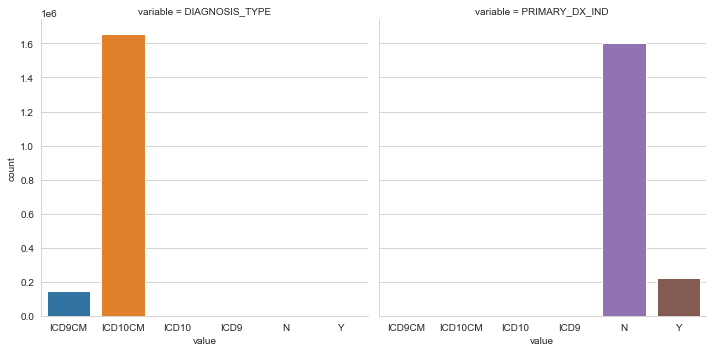

In [186]:
DIAGNOSES_sub_l = pd.melt(DIAGNOSES_sub, id_vars=['STUDY_ID'])
sns.catplot(data = DIAGNOSES_sub_l,col = 'variable',x = 'value',kind = 'count' )
p

In [ ]:
sns.catplot(data = DIAGNOSES_sub,hue = 'PRIMARY_DX_IND',x = 'DIAGNOSIS_TYPE',kind = 'count' )
DIAGNOSES_sub_l

# DEMOGRAPHICS

In [190]:
DEMOGRAPHICS = pd.read_csv(folder_path+'/'+os.listdir(folder_path)[4],encoding = "ISO-8859-1",low_memory=False)
print(DEMOGRAPHICS.GENDER.value_counts())

DEMOGRAPHICS

FEMALE     79066
MALE       69302
UNKNOWN        1
Name: GENDER, dtype: int64


,STUDY_ID,ED_DATE,AGE,GENDER,DEATH_DATE,ZIP_CODE
0,5222222982,12/18/2020,52,MALE,NaN,152
1,5222222837,03/25/2018,64,FEMALE,NaN,152
2,5222222889,01/02/2014,20,FEMALE,NaN,161
3,5222225207,02/12/2018,51,FEMALE,NaN,166
4,5222225207,03/10/2018,51,FEMALE,NaN,166
...,...,...,...,...,...,...
148364,5223870651,08/15/2020,0,FEMALE,NaN,160
148365,5223870646,08/14/2020,30,FEMALE,NaN,152
148366,5223870677,08/14/2020,60,MALE,NaN,155
148367,5223870673,08/14/2020,0,FEMALE,NaN,439


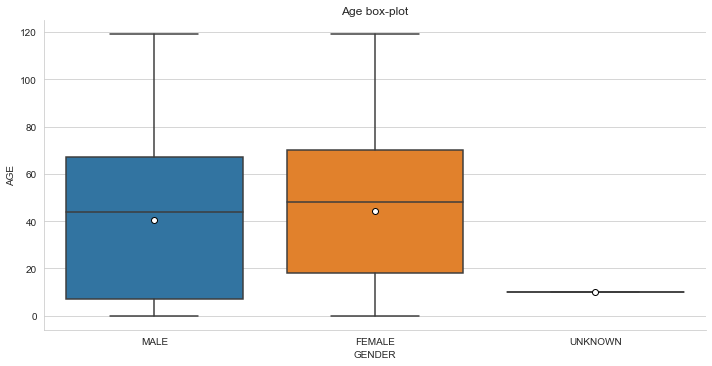

In [197]:

sns.catplot(data = DEMOGRAPHICS, y = 'AGE',x = 'GENDER',showmeans=True, kind='box',
                meanprops={'marker': 'o', 'markerfacecolor':'white', 'markeredgecolor':'black'},aspect = 2)
plt.title('Age box-plot')
plt.show()



In [108]:
DEMOGRAPHICS_d = DEMOGRAPHICS.loc[~DEMOGRAPHICS.DEATH_DATE.isna(),:]
#DEMOGRAPHICS_d.DEATH_DATE=pd.to_datetime(DEMOGRAPHICS_d['DEATH_DATE'])

DEMOGRAPHICS_d.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17511 entries, 7 to 148357
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDY_ID    17511 non-null  int64 
 1   ED_DATE     17511 non-null  object
 2   AGE         17511 non-null  int64 
 3   GENDER      17511 non-null  object
 4   DEATH_DATE  17511 non-null  object
 5   ZIP_CODE    17506 non-null  object
dtypes: int64(2), object(4)
memory usage: 957.6+ KB


In [109]:
DEMOGRAPHICS_d

,STUDY_ID,ED_DATE,AGE,GENDER,DEATH_DATE,ZIP_CODE
7,5222225247,02/01/2018,67,MALE,06/01/2019,161
9,5222225298,05/25/2018,41,MALE,05/25/2018,166
13,5222222497,01/11/2021,76,FEMALE,01/20/2021,151
16,5222222777,07/21/2020,72,MALE,10/03/2020,151
17,5222222734,09/20/2014,85,MALE,09/05/2016,150
...,...,...,...,...,...,...
148143,5223920428,04/14/2019,33,MALE,04/14/2019,166
148208,5223870876,09/16/2020,63,MALE,11/29/2020,166
148212,5223870881,08/19/2020,75,MALE,09/06/2020,161
148213,5223870881,08/26/2020,75,MALE,09/06/2020,161


In [110]:
DEMOGRAPHICS_d.describe(include = 'all')

,STUDY_ID,ED_DATE,AGE,GENDER,DEATH_DATE,ZIP_CODE
count,1.751100e+04,17511,17511.000000,17511,17511,17506
unique,NaN,2626,NaN,2,2593,181
top,NaN,12/08/2020,NaN,FEMALE,11/25/2020,152
freq,NaN,40,NaN,8806,77,4507
mean,5.223167e+09,NaN,69.971161,NaN,NaN,NaN
std,1.744443e+06,NaN,19.790797,NaN,NaN,NaN
min,5.220001e+09,NaN,0.000000,NaN,NaN,NaN
25%,5.222231e+09,NaN,62.000000,NaN,NaN,NaN
50%,5.222729e+09,NaN,74.000000,NaN,NaN,NaN
75%,5.225169e+09,NaN,84.000000,NaN,NaN,NaN


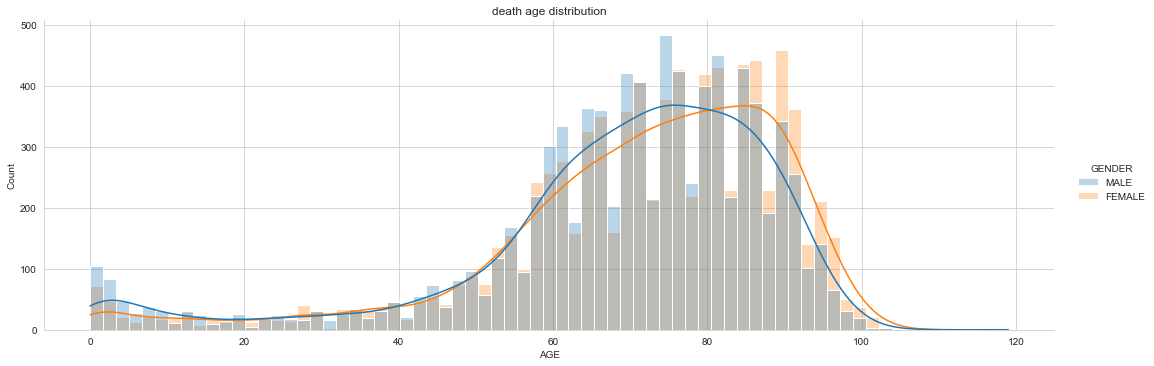

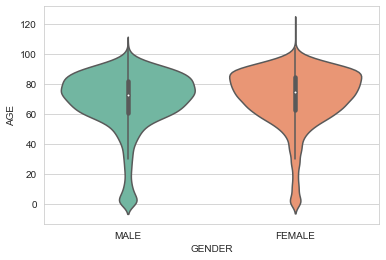

In [170]:
sns.displot(data = DEMOGRAPHICS_d, x = 'AGE',kde=True,hue = 'GENDER',fill=True,alpha = 0.3,aspect=3)
plt.title('death age distribution')

plt.show()
ax = sns.violinplot(x="GENDER", y="AGE",data=DEMOGRAPHICS_d, palette="Set2",showmeans=True,
                    split=True,title ='death age violin' )


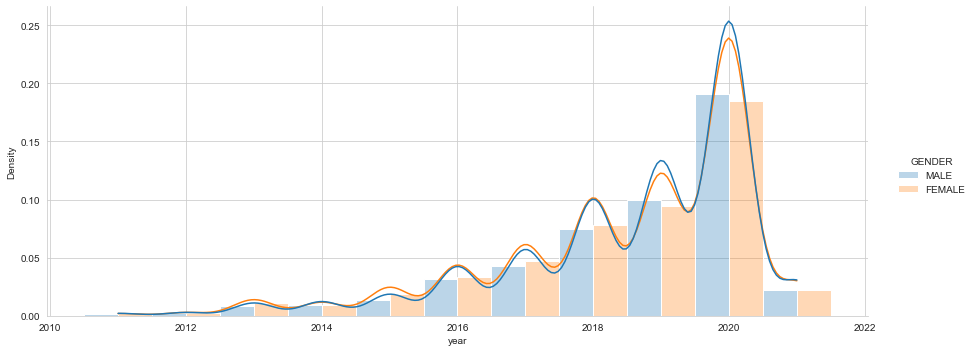

2021

In [154]:
year = []
tem = list(DEMOGRAPHICS_d.DEATH_DATE.copy())
for i in range(len(tem )):
    y = tem [i].split('/')[-1]
    year.append(int(y))
    
DEMOGRAPHICS_d_y =DEMOGRAPHICS_d.copy()
DEMOGRAPHICS_d_y.year = year.copy()
sns.displot(data = DEMOGRAPHICS_d, x = 'year',kde=True,hue = 'GENDER',stat="density",
            fill=True,alpha = 0.3,aspect=2.5,discrete=True,multiple="dodge")

plt.show()
max(DEMOGRAPHICS_d_y.year)

# LAB_RESULTS


In [9]:
LAB_RESULTS = pd.read_csv(folder_path+'/'+os.listdir(folder_path)[5],encoding = "ISO-8859-1",low_memory=False)
LAB_RESULTS


,STUDY_ID,COMPONENT_ID,LOINC_CD,ORDER_PROC_ID,RESULT_DATE,COMPONENT_NAME,ORD_VALUE,ORD_NUM_VALUE,REFERENCE_UNIT,REFERENCE_LOW,REFERENCE_HIGH,RESULT_FLAG,LAB_RESULT_STATUS,SPECIMEN_COLLECTED_DATE,SPECIMEN_RECEIVED_DATE,SPECIMEN_TYPE,SPECIMEN_SOURCE
0,5225051139,CHICA,NaN,1300669506234609,03/20/2011,"IONIZED CALCIUM, ISTAT",1.31,1.31,mmol/L,1.0,1.4,NaN,NaN,03/20/2011,03/20/2011,NaN,NaN
1,5221096496,MPV2,NaN,1300654567216343,03/20/2011,MEAN PLATELET VOLUME,7.4,7.40,fL,6.8,10.4,NaN,NaN,03/20/2011,03/20/2011,NaN,NaN
2,5221096496,MCVX2,NaN,1300745599389754,03/21/2011,MCV,91.6,91.60,fL,75.0,87.0,NaN,NaN,03/21/2011,03/21/2011,NaN,NaN
3,5222608343,CPCO2C,NaN,1299522596306602,03/07/2011,PCO2 ISTAT CAPILLARY,85,85.00,mmHg,32,48,NaN,NaN,03/07/2011,03/07/2011,NaN,NaN
4,5225013578,ALT2,NaN,1301420521714072,03/29/2011,ALANINE AMINOTRANS(ALT),25,25.00,IU/L,17,63,NaN,NaN,03/29/2011,03/29/2011,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20062170,5220012473,5,2345-7,500948329,01/05/2021,GLUCOSE,206,206.00,mg/dL,70,99,HIGH,FINAL,01/05/2021,01/05/2021,NaN,NaN
20062171,5220012473,24,3094-0,500948329,01/05/2021,UREA NITROGEN,26,26.00,mg/dL,8,26,NaN,FINAL,01/05/2021,01/05/2021,NaN,NaN
20062172,5220012473,20,1751-7,500948329,01/05/2021,ALBUMIN,3.1,3.10,g/dL,3.4,5.0,LOW,FINAL,01/05/2021,01/05/2021,NaN,NaN
20062173,5220012473,13,1742-6,500948329,01/05/2021,ALANINE AMINOTRANS(ALT),53,53.00,IU/L,17,63,NaN,FINAL,01/05/2021,01/05/2021,NaN,NaN


In [ ]:
LAB_RESULTS.info()



# ENCOUNTERS

In [7]:
ENCOUNTERS= pd.read_csv(folder_path+'/'+os.listdir(folder_path)[6],encoding = "ISO-8859-1",low_memory=False)
ENCOUNTERS


,STUDY_ID,START_DATE,END_DATE,ENC_TYPE,LOCATION,APPT_STATUS,ADMIT_SOURCE,HOSPITAL_SERVICE,PATIENT_TYPE,PATIENT_CLASS,CHIEF_COMPLAINT,CHIEF_COMPLAINT_ONSET_DATE
0,5222075010,12/27/2011,12/30/2011,INPATIENT,SHADYSIDE,NaN,MED STAFF REFERRAL,GENERAL MEDICINE,I INPATIENT,Inpatient,GRAM NEGATIVE ROD BACTEREMIA,12/27/2011 1824
1,5222788993,09/12/2011,09/15/2011,EMERGENCY,SHADYSIDE,NaN,MED STAFF REFERRAL,ENDOCRINOLOGY,EMERGENCY DEPT,Emergency Department,CIP,09/12/2011 2025
2,5222734234,09/23/2011,09/23/2011,EMERGENCY,SHADYSIDE,NaN,MED STAFF REFERRAL,EMERGENCY MEDICINE,EMERGENCY DEPT,Emergency Department,FLU SYMPTOMS,09/23/2011 1516
3,5222990158,11/24/2011,11/24/2011,EMERGENCY,SHADYSIDE,NaN,MED STAFF REFERRAL,EMERGENCY MEDICINE,EMERGENCY DEPT,Emergency Department,POSS FLU,11/24/2011 1734
4,5225514453,11/21/2011,NaN,OUTPATIENT,PRESBYTERIAN,NaN,MED STAFF REFERRAL,INTERNAL MEDICINE,SV SINGLE VISIT,Outpatient,EXAM,11/21/2011 0800
...,...,...,...,...,...,...,...,...,...,...,...,...
1995726,5223030638,01/04/2021,NaN,UPMC HOSPITAL SUMMARY,UPMC INPATIENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995727,5223030638,01/03/2021,NaN,HOSPITAL-ENCOUNTER,IP ALTOONA 5F PEDIATRICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995728,5223030638,01/01/2021,NaN,EKG,EXTERNAL DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995729,5223030638,01/02/2021,NaN,NUTRITION,IP ALTOONA 5F PEDIATRICS,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ENCOUNTERS.sort_values(['STUDY_ID','START_DATE'])

,STUDY_ID,START_DATE,END_DATE,ENC_TYPE,LOCATION,APPT_STATUS,ADMIT_SOURCE,HOSPITAL_SERVICE,PATIENT_TYPE,PATIENT_CLASS,CHIEF_COMPLAINT,CHIEF_COMPLAINT_ONSET_DATE
490691,5220000150,02/20/2018,NaN,LAB RESULTS,EXTERNAL DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567141,5220000150,02/20/2018,02/20/2018,EMERGENCY,JAMESON,NaN,MED STAFF REFERRAL,EMERGENCY MEDICINE,EMERGENCY DEPT,Emergency Department,"FEVER, CHILLS, BODY ACHES, NAUSEA",02/20/2018 0552
653582,5220000150,02/20/2018,NaN,HOSPITAL-ENCOUNTER,EXTERNAL DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653700,5220000150,02/20/2018,NaN,ER REPORT,EXTERNAL DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1647831,5220000355,10/17/2020,NaN,EKG,EXTERNAL DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1919262,5229272723,12/28/2020,NaN,LAB RESULTS,EXTERNAL DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919263,5229272723,12/28/2020,NaN,LAB RESULTS,EXTERNAL DEPARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919264,5229272723,12/28/2020,12/28/2020,EMERGENCY,PASSAVANT,NaN,MED STAFF REFERRAL,EMERGENCY MEDICINE,EMERGENCY DEPT,Emergency Department,EMS COVID +/PANIC ATTACK AT UC,28-DEC-20 1628
1919255,5229272723,12/29/2020,NaN,TELEMEDICINE,HVI PASSAVANT HBC OFC,COMPLETED,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ENCOUNTERS.groupby('STUDY_ID').

In [202]:
ENCOUNTERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995731 entries, 0 to 1995730
Data columns (total 12 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   STUDY_ID                    int64 
 1   START_DATE                  object
 2   END_DATE                    object
 3   ENC_TYPE                    object
 4   LOCATION                    object
 5   APPT_STATUS                 object
 6   ADMIT_SOURCE                object
 7   HOSPITAL_SERVICE            object
 8   PATIENT_TYPE                object
 9   PATIENT_CLASS               object
 10  CHIEF_COMPLAINT             object
 11  CHIEF_COMPLAINT_ONSET_DATE  object
dtypes: int64(1), object(11)
memory usage: 182.7+ MB


In [200]:
ENCOUNTERS.describe(include = 'all')

,STUDY_ID,START_DATE,END_DATE,ENC_TYPE,LOCATION,APPT_STATUS,ADMIT_SOURCE,HOSPITAL_SERVICE,PATIENT_TYPE,PATIENT_CLASS,CHIEF_COMPLAINT,CHIEF_COMPLAINT_ONSET_DATE
count,1.995731e+06,1995731,166798,1995728,1989056,91463,182802,182802,182753,182802,181450,181492
unique,NaN,3643,3536,150,2959,8,19,58,45,5,74099,164729
top,NaN,11/30/2020,11/30/2020,LAB RESULTS,EXTERNAL DEPARTMENT,COMPLETED,MED STAFF REFERRAL,EMERGENCY MEDICINE,EMERGENCY DEPT,Emergency Department,FEVER,01-DEC-20 0800
freq,NaN,6396,466,406279,1105049,42251,170669,75242,97420,97445,9844,24
mean,5.223098e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.815078e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.220000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.222143e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.222740e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.225087e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
ENCOUNTERS_small = ENCOUNTERS.loc[:,['APPT_STATUS','ADMIT_SOURCE','PATIENT_CLASS']]
ENCOUNTERS_small

,APPT_STATUS,ADMIT_SOURCE,PATIENT_CLASS
0,NaN,MED STAFF REFERRAL,Inpatient
1,NaN,MED STAFF REFERRAL,Emergency Department
2,NaN,MED STAFF REFERRAL,Emergency Department
3,NaN,MED STAFF REFERRAL,Emergency Department
4,NaN,MED STAFF REFERRAL,Outpatient
...,...,...,...
1995726,NaN,NaN,NaN
1995727,NaN,NaN,NaN
1995728,NaN,NaN,NaN
1995729,NaN,NaN,NaN


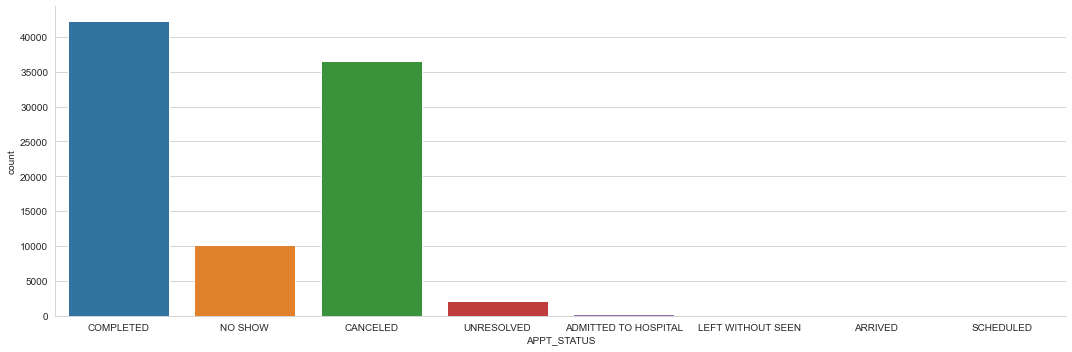

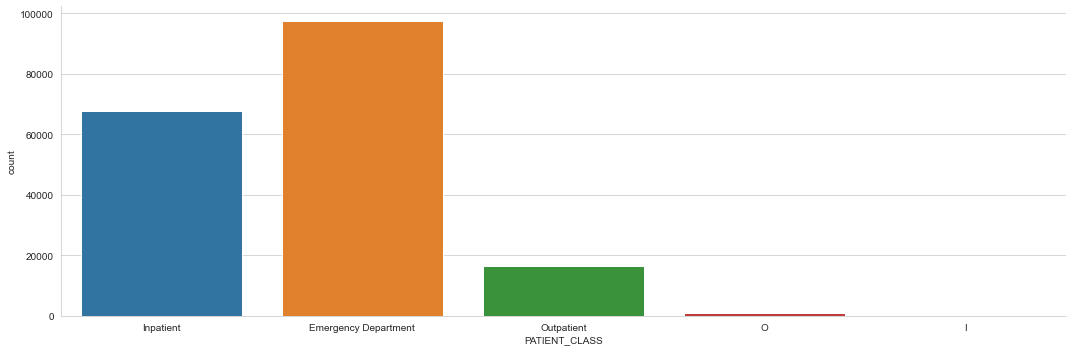

In [213]:
sns.catplot(data = ENCOUNTERS_small,x = 'APPT_STATUS',kind = 'count',aspect = 3)
plt.show()

sns.catplot(data = ENCOUNTERS_small,x = 'PATIENT_CLASS',kind = 'count',aspect = 3)
plt.show()

In [230]:
AS = pd.DataFrame(ENCOUNTERS_small['ADMIT_SOURCE'].value_counts()).reset_index().rename(columns={'index': 'Name','ADMIT_SOURCE':'Count'})

(AS)

,Name,Count
0,MED STAFF REFERRAL,170669
1,HOSPITAL TRANSFER,5992
2,TRANS FRM SNF/ICF,3025
3,7,939
4,XFER OTH HLTH CR FAC,766
5,NON-STAFF REFERRAL,503
6,SPECIMEN,343
7,D,204
8,8,163
9,B,102


# PROBLEM_LIST

In [7]:
PROBLEM_LIST= pd.read_csv(folder_path+'/'+os.listdir(folder_path)[7],encoding = "ISO-8859-1",low_memory=False)
PROBLEM_LIST

,STUDY_ID,DX_CODE_TYPE,DX_CODE,DX_NAME,REPORTED_DATE,ONSET_DATE,RESOLVED_DATE,RESOLVED_REASON,PROBLEM_STATUS
0,5225578080,ICD9,724.2,Low back pain,04/08/2014,10/08/2012,04/08/2014,NaN,RESOLVED
1,5220254573,ICD9,518.81,Respiratory failure(Notable Code),12/08/2014,12/08/2014,NaN,NaN,ACTIVE
2,5222136800,ICD9,V22.1,Supervision of other normal pregnancy,02/12/2014,07/01/2013,NaN,NaN,ACTIVE
3,5225869531,ICD9,783.40,Developmental delay,12/12/2014,12/12/2014,NaN,NaN,ACTIVE
4,5225869531,ICD9,796.6,Abnormal findings on newborn screening,12/12/2014,12/12/2014,NaN,NaN,ACTIVE
...,...,...,...,...,...,...,...,...,...
9491,5225573601,ICD10,E66.3,Overweight with body mass index (BMI) 25.0-29.9,01/14/2021,12/05/2020,NaN,NaN,ACTIVE
9492,5222758603,ICD10,L50.9,Urticarial dermatitis,01/02/2021,01/02/2021,NaN,NaN,ACTIVE
9493,5222869569,ICD10,D84.9,Immunocompromised (HCC),01/04/2021,01/04/2021,NaN,NaN,ACTIVE
9494,5222801212,ICD10,Z95.1,Hx of CABG,01/02/2021,01/02/2021,NaN,NaN,ACTIVE


In [8]:
PROBLEM_LIST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STUDY_ID         9496 non-null   int64  
 1   DX_CODE_TYPE     9496 non-null   object 
 2   DX_CODE          9496 non-null   object 
 3   DX_NAME          9496 non-null   object 
 4   REPORTED_DATE    9496 non-null   object 
 5   ONSET_DATE       8943 non-null   object 
 6   RESOLVED_DATE    1366 non-null   object 
 7   RESOLVED_REASON  0 non-null      float64
 8   PROBLEM_STATUS   9496 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 667.8+ KB


In [9]:
PROBLEM_LIST.describe(include = 'all')



,STUDY_ID,DX_CODE_TYPE,DX_CODE,DX_NAME,REPORTED_DATE,ONSET_DATE,RESOLVED_DATE,RESOLVED_REASON,PROBLEM_STATUS
count,9.496000e+03,9496,9496,9496,9496,8943,1366,0.0,9496
unique,NaN,2,2691,4673,1550,2444,519,NaN,3
top,NaN,ICD10,I10,Essential hypertension,01/14/2021,11/28/2020,11/20/2017,NaN,ACTIVE
freq,NaN,8666,177,89,46,38,21,NaN,7900
mean,5.223103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.759645e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.220001e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.222191e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.222745e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.225072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


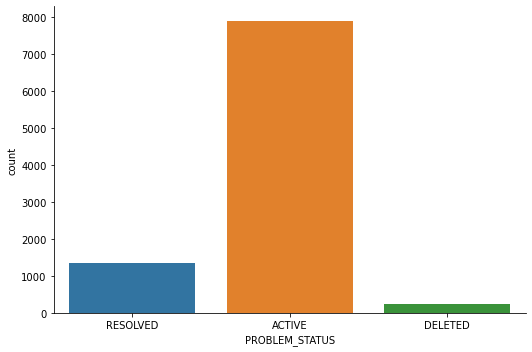

ACTIVE      7900
RESOLVED    1348
DELETED      248
Name: PROBLEM_STATUS, dtype: int64

In [14]:
sns.catplot(data = PROBLEM_LIST, x='PROBLEM_STATUS',kind = 'count',aspect=1.5)
plt.show()
PROBLEM_LIST.PROBLEM_STATUS.value_counts()



# ENCOUNTER_NOTES

In [ ]:
ENCOUNTER_NOTES= pd.read_csv(folder_path+'/'+os.listdir(folder_path)[8],encoding = "ISO-8859-1",low_memory=False)
ENCOUNTER_NOTES.head()



# PROCEDURE_NOTES

In [16]:
PROCEDURE_NOTES= pd.read_csv(folder_path+'/'+os.listdir(folder_path)[9],encoding = "ISO-8859-1",low_memory=False)
PROCEDURE_NOTES



,STUDY_ID,ORDER_PROC_ID,ORDER_DATE,RESULT_TIME,PROCEDURE_CODE,PROCEDURE_NAME,NOTE_CSN_ID,LINE_NUM,NOTE_TEXT
0,5225275686,83482598,01/09/2012,01/09/2012,0042T,"CT PERFUSION BRAIN WITH CONTRAST, CBF",990083482598,1,CLINICAL HISTORY:
1,5225275686,83482598,01/09/2012,01/09/2012,0042T,"CT PERFUSION BRAIN WITH CONTRAST, CBF",990083482598,2,69-year-old female with stroke.
2,5225275686,83482598,01/09/2012,01/09/2012,0042T,"CT PERFUSION BRAIN WITH CONTRAST, CBF",990083482598,3,
3,5225275686,83482598,01/09/2012,01/09/2012,0042T,"CT PERFUSION BRAIN WITH CONTRAST, CBF",990083482598,4,COMPARISON:
4,5225275686,83482598,01/09/2012,01/09/2012,0042T,"CT PERFUSION BRAIN WITH CONTRAST, CBF",990083482598,5,None.
...,...,...,...,...,...,...,...,...,...
8731122,5225480670,494155553,11/23/2020,12/23/2020,IMG75,XR SACROILIAC JOINTS MINIMUM 3 VIEWS,990494155553,28,overall appearance. No erosive or productive a...
8731123,5225480670,494155553,11/23/2020,12/23/2020,IMG75,XR SACROILIAC JOINTS MINIMUM 3 VIEWS,990494155553,29,identified. The femoral heads are slightly elo...
8731124,5225480670,494155553,11/23/2020,12/23/2020,IMG75,XR SACROILIAC JOINTS MINIMUM 3 VIEWS,990494155553,30,noted.
8731125,5225480670,494155553,11/23/2020,12/23/2020,IMG75,XR SACROILIAC JOINTS MINIMUM 3 VIEWS,990494155553,31,


In [17]:
PROCEDURE_NOTES.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8731127 entries, 0 to 8731126
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   STUDY_ID        int64 
 1   ORDER_PROC_ID   int64 
 2   ORDER_DATE      object
 3   RESULT_TIME     object
 4   PROCEDURE_CODE  object
 5   PROCEDURE_NAME  object
 6   NOTE_CSN_ID     int64 
 7   LINE_NUM        int64 
 8   NOTE_TEXT       object
dtypes: int64(4), object(5)
memory usage: 599.5+ MB


In [18]:
PROCEDURE_NOTES.describe(include = 'all')



,STUDY_ID,ORDER_PROC_ID,ORDER_DATE,RESULT_TIME,PROCEDURE_CODE,PROCEDURE_NAME,NOTE_CSN_ID,LINE_NUM,NOTE_TEXT
count,8.731127e+06,8.731127e+06,8731127,8718481,8731127,8731127,8.731127e+06,8.731127e+06,8730915
unique,NaN,NaN,3511,3530,1076,1289,NaN,NaN,2552230
top,NaN,NaN,12/07/2020,11/13/2020,93306,TTE WITH DOPPLER COMPLETE BUNDLED,NaN,NaN,
freq,NaN,NaN,30376,29815,1292318,1177459,NaN,NaN,1468907
mean,5.223130e+09,3.865346e+08,NaN,NaN,NaN,NaN,9.903865e+11,2.482780e+01,NaN
std,1.824447e+06,1.034911e+08,NaN,NaN,NaN,NaN,1.034911e+08,3.113502e+01,NaN
min,5.220000e+09,2.345674e+07,NaN,NaN,NaN,NaN,9.900235e+11,1.000000e+00,NaN
25%,5.222160e+09,3.334138e+08,NaN,NaN,NaN,NaN,9.903334e+11,7.000000e+00,NaN
50%,5.222743e+09,4.081664e+08,NaN,NaN,NaN,NaN,9.904082e+11,1.500000e+01,NaN
75%,5.225120e+09,4.721234e+08,NaN,NaN,NaN,NaN,9.904721e+11,3.200000e+01,NaN
